# **Title: Heart Disease Prediction**

`Author:`[Najeeb ullah](https://github.com/najeebjony)\
`Date:` 04.jan.2024\
`Dataset"` [Heart Disease UCi](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## Meta-Data (About Dataset)
### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex `(Male/Female)
* `cp` chest pain type typical 
1. typical angina
2. atypical angina
3. non-anginal
4. asymptomati

* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D

# Aims and Objective:

we will fill this after some exploratory Data Analysis (EDA).

# import libraries 

Let's Start the project by impoprtig all the libraries that we will need in the project.

In [1]:
# import libraries 

# 1. to handel the data 
import pandas as pd
import numpy as np

# to visualiztion the dataset 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

# to preprocess the data 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder 
from sklearn.impute import SimpleImputer, KNNImputer

# import iterative imputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# for classification tasks 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

### Load the dataset 

In [2]:
# laod the dataset from csv file placed locally in our pc 
df = pd.read_csv('heart_disease_uci.csv')   

# print the first 5 rows of the dataframe
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## **Exploratory Data Analysis (EDA)**

#### Explore each Columns 

In [3]:
# ecploring the datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# check the the dataset shape 
df.shape

(920, 16)

In [5]:
# id column 
df['id'].min(), df['id'].max()

(1, 920)

In [6]:
# let's summarise the age column
df['age'].describe().T

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [7]:
# Age column 
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

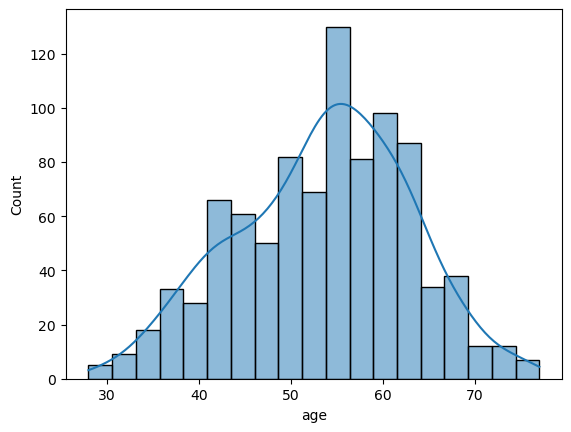

In [8]:
# draw a histogram to see the distribution of age column 
sns.histplot(df['age'], kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


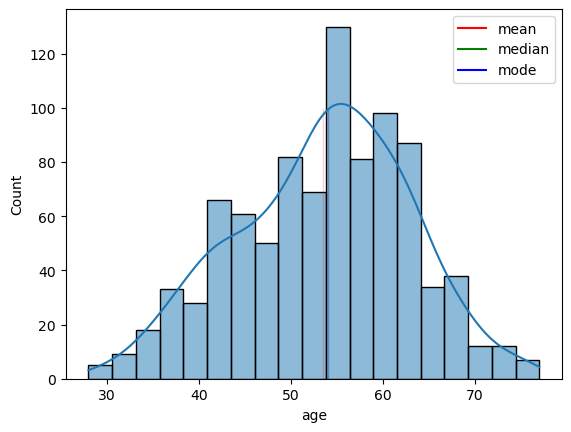

In [9]:
# plot the mean, median and mode of age column using sns

sns.histplot(df['age'], kde=True)

mean = df['age'].mean()
median = df['age'].median()
mode = df['age'].mode()[0]

sns.lineplot(x=[mean, mean], y=[0, 100], color='red', label='mean')
sns.lineplot(x=[median, median], y=[0, 100], color='green', label='median')
sns.lineplot(x=[mode, mode], y=[0, 100], color='blue', label='mode')

# both code are working same 

# plt.axline(df['age'].mean(), color='red')
# plt.axline(df['age'].median(), color='green')
# plt.axline(df['age'].mode()[0], color='blue')

# print the values of mean median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

let's explore the gender based distribution of the dataset for age column.

In [10]:
# plot the histogram of age colum using plotly coloring this by sex. size 

import plotly.express as px

fig = px.histogram(df, x="age", color="sex", marginal="box", hover_data=df.columns)

# fig = px.histogram(df, x="age", color="sex")
fig.show()




In [11]:
# find the values count of age column grouping by sex column 
df['age'].value_counts()

age
54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: count, dtype: int64

In [12]:
df.groupby('sex')['age'].value_counts().sum()

920

In [13]:
# find out the percentage of sex column 
df['sex'].value_counts(normalize=True)

sex
Male      0.78913
Female    0.21087
Name: proportion, dtype: float64

In [14]:
# calculate the percentages of male and female value counts in the dataset

male_count = 194
female_count = 726
total_count = male_count + female_count

# calculate percentages 
percentage_male = (male_count / total_count) * 100
percentage_female = (female_count / total_count) * 100

#Display the result 
print(f"The percentage of males is {round(percentage_male, 2)}%")
print(f"The percentage of females is {round(percentage_female, 2)}%")

#difference 
diff = abs(percentage_male - percentage_female)
print(f"The difference between male and female {round(diff, 2)}%")


The percentage of males is 21.09%
The percentage of females is 78.91%
The difference between male and female 57.83%


In [15]:
# find the values count of age column grouping by sex column 
df['age'].value_counts()


# groupby method can be used to perform this task. It is a powerful data manipulation tool
# Use the groupby method to group the data by the 'sex' column and perform a count on the 'age' column
age_count_by_sex = df.groupby('sex')['age'].count()

# Print the result
print(age_count_by_sex)

sex
Female    194
Male      726
Name: age, dtype: int64


In [16]:
# let's deal with dataset column 
# find the unique values in dataset column 
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [17]:
# fine unique values count in dataset column 
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [18]:
# plot the counplot of dataset column 
# sns.countplot(data=df, x='dataset', hue='sex')

fig=px.bar(df, x='dataset', color='sex')
fig.show()

# print the values counts of dataset column grouped by sex 
df.groupby('sex')["dataset"].value_counts()


sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [19]:
# make a plot of age column using plotly and coloring the by dataset column 
fig = px.histogram(df, x="age", color="dataset", marginal="box", hover_data=df.columns)
fig.show()

# find the mean of age column grouped by dataset column

In [20]:
print("Mean of Data Set:", df.groupby('dataset')['age'].mean())
print("----------------------------------------------------------")
print("Median of Data Set:", df.groupby('dataset')['age'].median())
print("----------------------------------------------------------")
print("Mode of Data Set:", df.groupby('dataset')['age'].agg(pd.Series.mode))
print("----------------------------------------------------------")


Mean of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
----------------------------------------------------------
Median of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------------------------------------------------------
Mode of Data Set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
----------------------------------------------------------


In [21]:
mean_age = df.groupby('dataset')['age'].mean()
percentage_diff = (mean_age[0] - mean_age[1]) / mean_age[1]
print(f"The percentage difference in Age column for each Dataset group is {round(percentage_diff * 100, 2)}%")


The percentage difference in Age column for each Dataset group is 13.48%


### Let's explore cp (Chest Pain) column:



In [22]:
# values counts of cp column 

df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

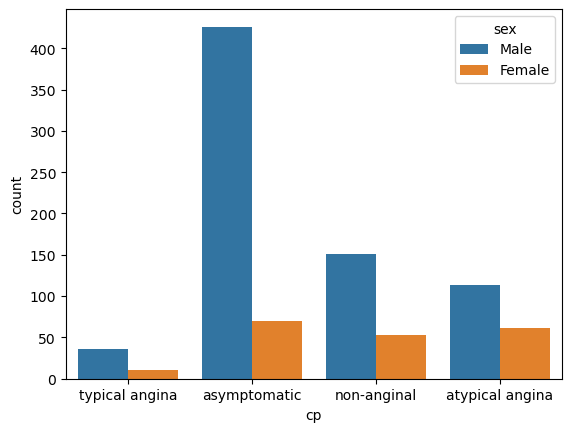

In [23]:

# Plot the sex column grouped by cp column
sns.countplot(data=df, x='cp', hue='sex')
plt.show()

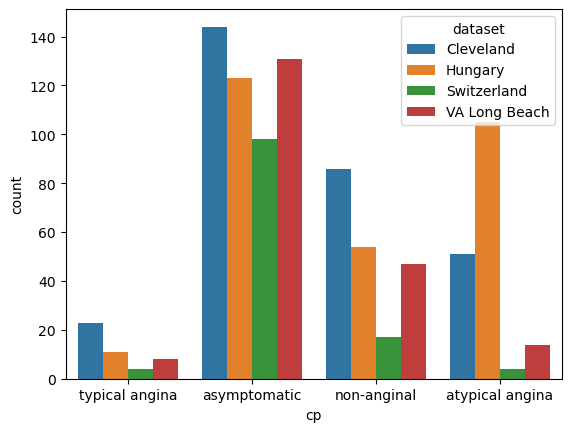

In [24]:
# count plot of cp column by dataset colum 
sns.countplot(data=df, x='cp', hue='dataset')
plt.show()

In [25]:
# draw the plot of age colum grouped by cp column using plotly
fig = px.histogram(df, x="age", color="cp", marginal="box", hover_data=df.columns)
fig.show()

### Let's explore the trestbps(resting blood presure) column:

The normal resting blood presure is 120/80 mm Hg.

`write here, what will happen if the blood presure is high or low and then you can bin the data based on these values. `

In [26]:
# find the values counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

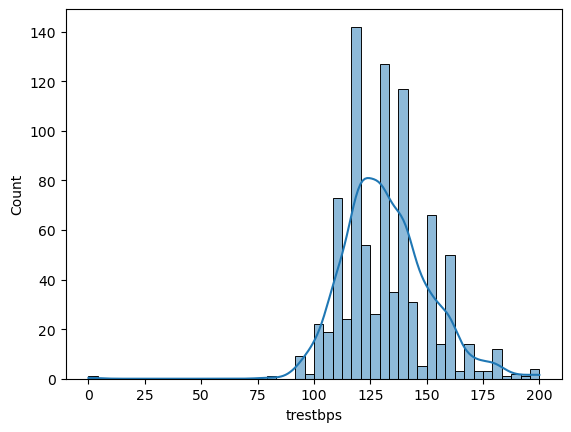

In [27]:
# create a histplot of trestbps column 
sns.histplot(df['trestbps'], kde=True)

In [172]:
# deal with missing values in trestbps colum
# find the percentage of missing values in trestbps column
print(f"percentage of missing values in trestbps column:){df['trestbps'].isnull().sum() / len(df) *100:.2f}%")




percentage of missing values in trestbps column:)6.41%


In [173]:
# impute the missing values of trestbps column using KNN imputer 

# create an object of KNN imputer
imputer_1 = KNNImputer(n_neighbors=7)

# fit the imputer on the training data and transform it to fill the missing values in
# the training data
df['trestbps'] = imputer_1.fit_transform(df[['trestbps']])
# check missing values using print 
print(f"missing values in trestbps column:){df['trestbps'].isnull().sum() / len(df) *100:.2f}%")

missing values in trestbps column:)0.00%


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [175]:
# let's impute other column with missin values 
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)


ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

In [176]:
# impute missing values using KNN 
imputer_2 = KNNImputer(n_neighbors=7)

# fit the imputer on the training data and transform it to fill the missing values in
# the training data
df[['ca','oldpeak','thalch','chol']] = imputer_2.fit_transform(df[['ca', 'oldpeak', 'thalch', 'chol']])
# check missing values using print
print(f"missing values in ca, oldpeak, thalch, chol column:){df['ca'].isnull().sum() / len(df) *100:.2f}%")

missing values in ca, oldpeak, thalch, chol column:)0.00%


In [202]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)


thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64

## Let's impute missing values in thal column by using ML models:


In [195]:
print(f"The missing values in thal column are:{df['thal'].isnull().sum()}")

The missing values in thal column are:486


In [194]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

#### Outputs:
1. Thm minium age to have a heart disease starts from 28 Years old.
2. Most of the pople get heart disease at the age 54-55 years
3. Most of the male and female get are with heart disease at the age 54-55 years.
4. The percentage of males is 21.09%
5. The percentage of females is 78.91%
6. The difference between male and female 57.83%
7. we have highest number of people from cleveland (304) and lowest from Switzerland (123)
   1. The highest number of female in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).
   2. The highest number of male in the dataset are from Hungary (212) and lowest from Swizerland (113).
   3. 
8. The percentage difference in Age column for each Dataset group is 13.48%
9. `write down the observation here about Mean, Median, Mode of age column, grouped by dataset column.`


10. `write down the observation from cp column here`
